In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "BigWestCareerRankings.csv"
df = pd.read_csv(file_path)

sns.set(style="whitegrid")
custom_palette = sns.color_palette("husl", n_colors=df["TEAM"].nunique())  # Use distinct colors
team_colors = dict(zip(df["TEAM"].unique(), custom_palette))

In [15]:
metrics = ["ORTG", "EFG", "TS", "3P", "2P", "AST", "TO", "STL", "BLK", "USG"]
df_numeric = df[["PLAYER", "TEAM"] + metrics].dropna()

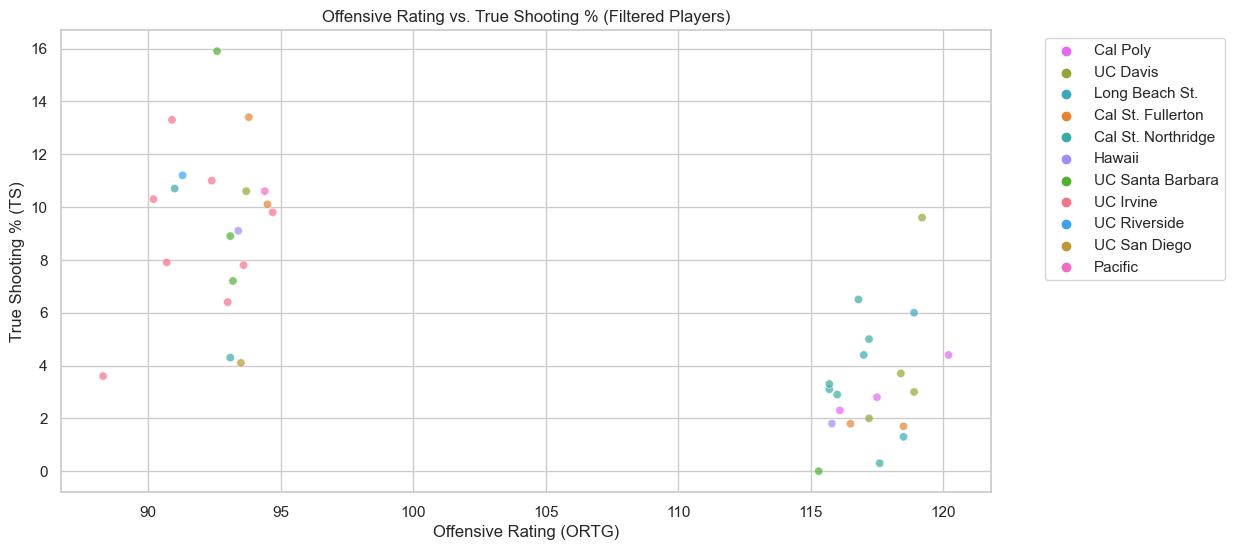

In [16]:
# Reduce data points for scatter plot by selecting top and bottom performers
filtered_df = pd.concat([df_numeric.nlargest(20, "ORTG"), df_numeric.nsmallest(20, "ORTG")])

# Scatter Plot: Offensive Rating vs. True Shooting %
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x="ORTG", y="TS", hue="TEAM", alpha=0.7, palette=team_colors)
plt.title("Offensive Rating vs. True Shooting % (Filtered Players)")
plt.xlabel("Offensive Rating (ORTG)")
plt.ylabel("True Shooting % (TS)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

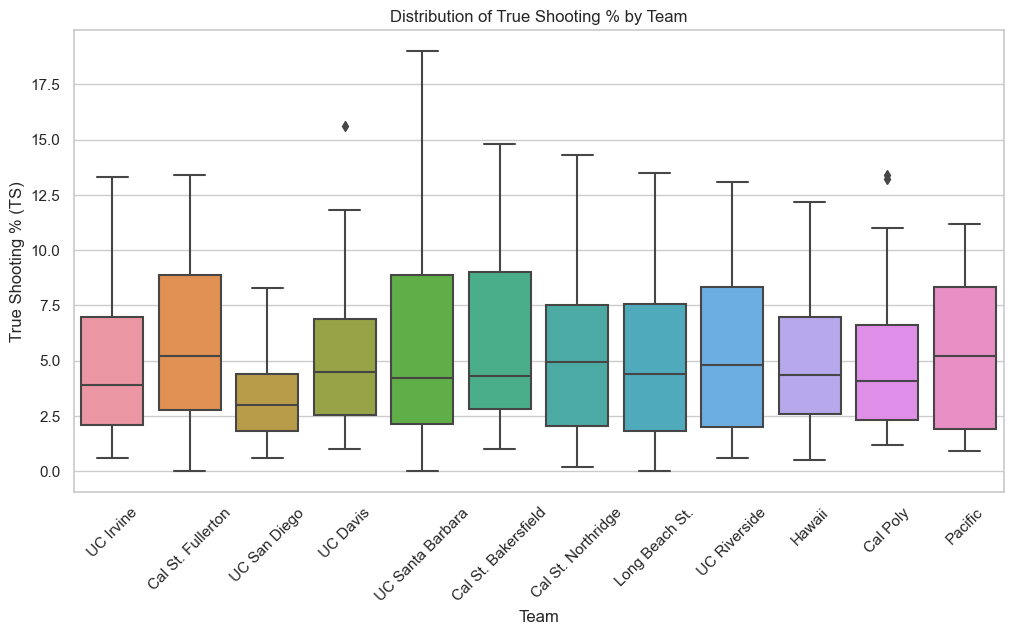

In [4]:
# Box Plot: True Shooting % Distribution by Team
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric, x="TEAM", y="TS")
plt.xticks(rotation=45)
plt.title("Distribution of True Shooting % by Team")
plt.xlabel("Team")
plt.ylabel("True Shooting % (TS)")
plt.show()

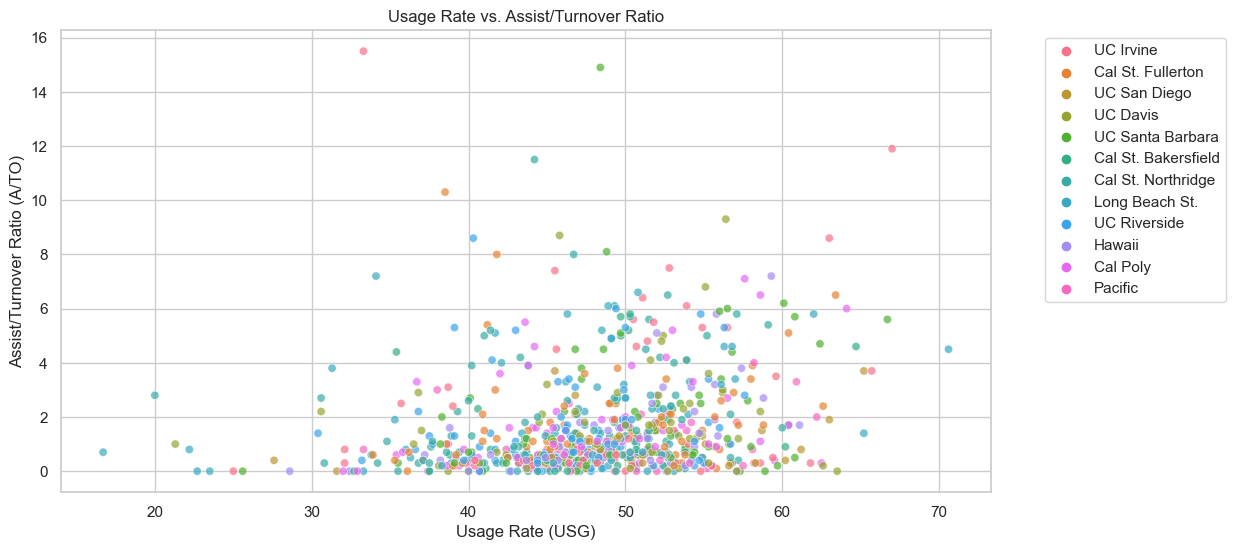

In [5]:
# Convert Assist/Turnover ratio to numeric if present
if "A/TO" in df.columns:
    df_numeric["A/TO"] = pd.to_numeric(df["A/TO"], errors='coerce')

# Scatter Plot: Usage Rate vs. Assist/Turnover Ratio
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_numeric, x="USG", y="A/TO", hue="TEAM", alpha=0.7)
plt.title("Usage Rate vs. Assist/Turnover Ratio")
plt.xlabel("Usage Rate (USG)")
plt.ylabel("Assist/Turnover Ratio (A/TO)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

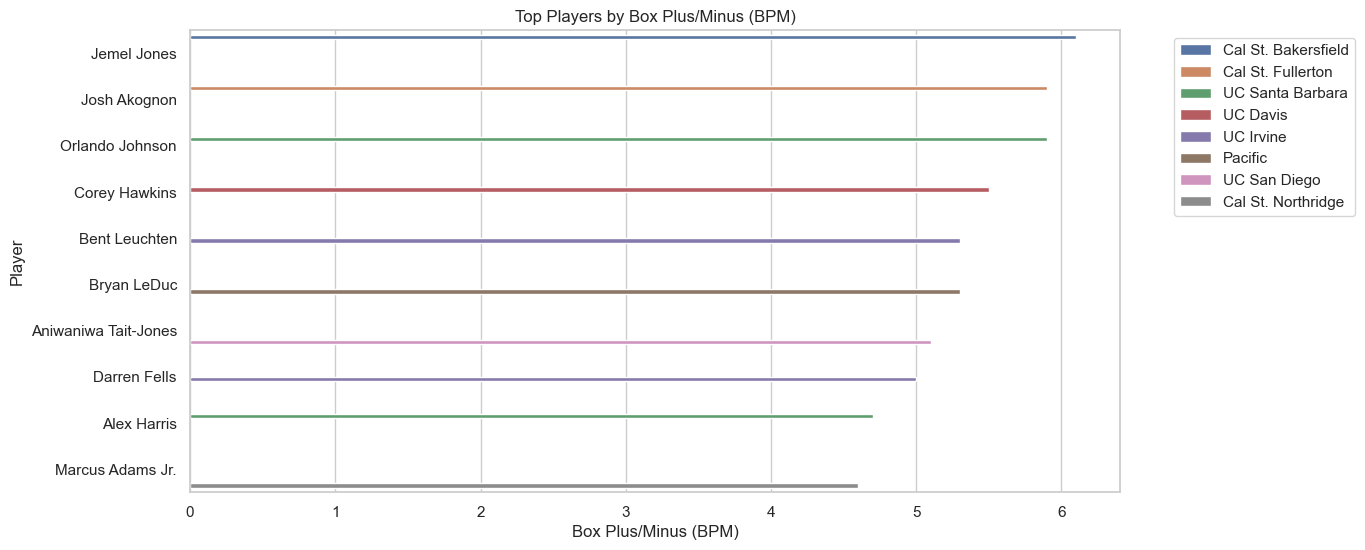

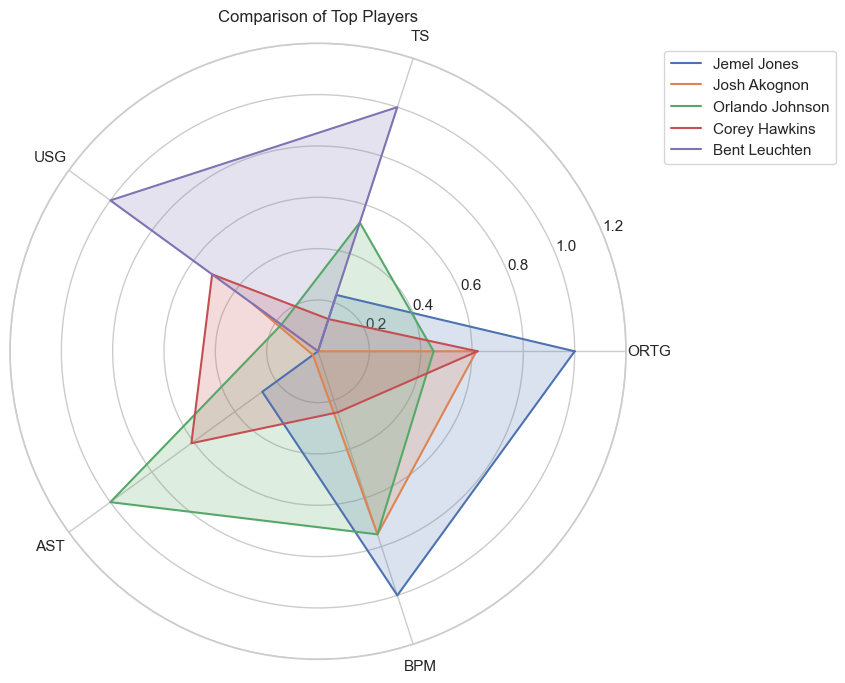

In [9]:
# Set visualization style
sns.set(style="whitegrid")

# Select relevant statistics
metrics = ["ORTG", "EFG", "TS", "3P", "2P", "AST", "TO", "STL", "BLK", "USG", "BPM"]
df_numeric = df[["PLAYER", "TEAM"] + metrics].dropna()

# Identify top players based on a selected metric
def get_top_players(df, metric, top_n=10):
    return df.nlargest(top_n, metric)

# Select top players based on BPM
top_players = get_top_players(df_numeric, "BPM")

# Bar Plot: Top Players by BPM
plt.figure(figsize=(12, 6))
sns.barplot(data=top_players, x="BPM", y="PLAYER", hue="TEAM")
plt.title("Top Players by Box Plus/Minus (BPM)")
plt.xlabel("Box Plus/Minus (BPM)")
plt.ylabel("Player")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Radar Chart for Top Players
def radar_chart(players_df, metrics):
    labels = np.array(metrics)
    num_vars = len(labels)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Normalize values for better spread
    min_vals = players_df[metrics].min()
    max_vals = players_df[metrics].max()
    scaled_players_df = (players_df[metrics] - min_vals) / (max_vals - min_vals)
    
    for _, row in scaled_players_df.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=players_df.loc[row.name, "PLAYER"])
        ax.fill(angles, values, alpha=0.2)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 1.2)  # Spread out the scale
    plt.title("Comparison of Top Players")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Compare top 5 players using radar chart
radar_chart(top_players.head(5), ["ORTG", "TS", "USG", "AST", "BPM"])

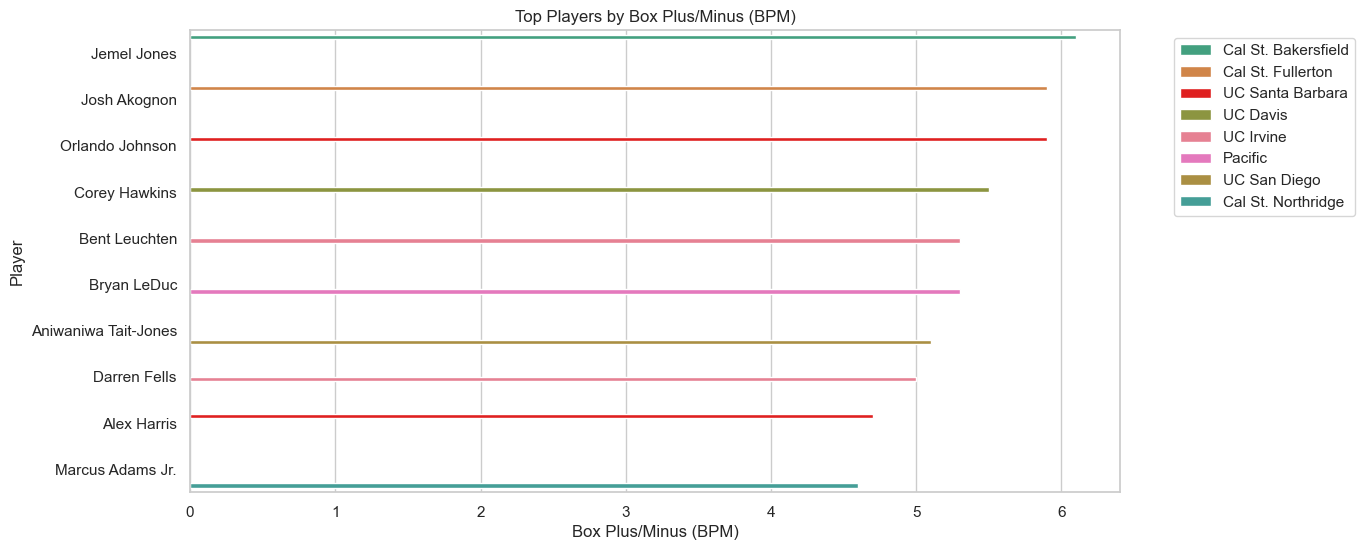

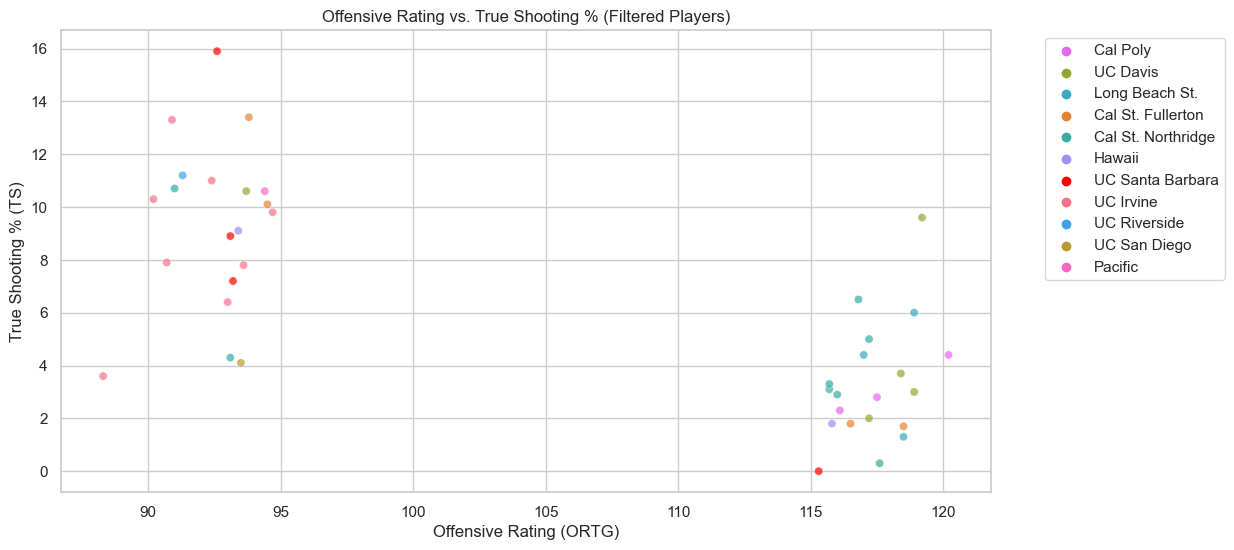

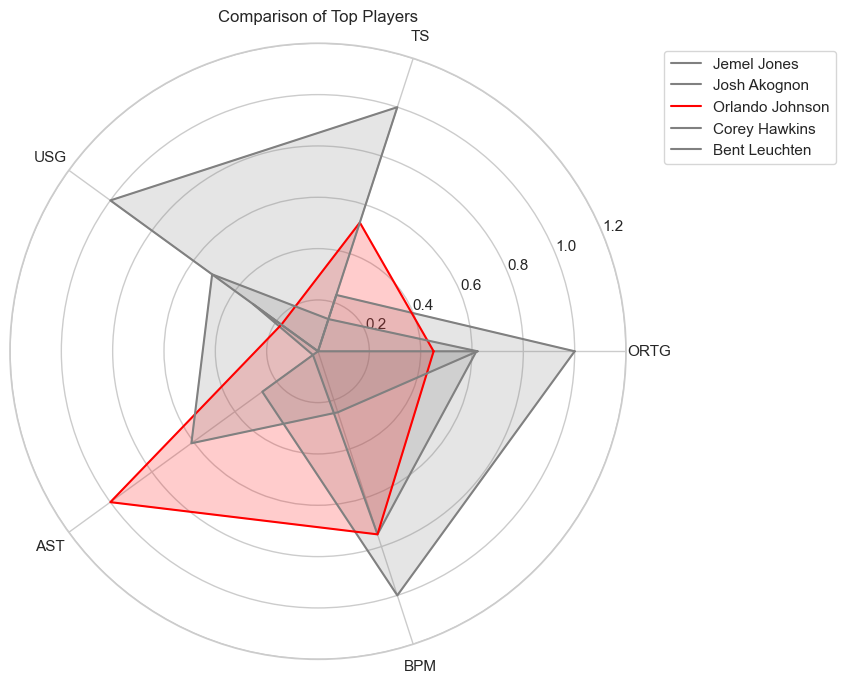

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = "BigWestCareerRankings.csv"
df = pd.read_csv(file_path)

# Set visualization style
sns.set(style="whitegrid")
custom_palette = sns.color_palette("husl", n_colors=df["TEAM"].nunique())  # Use distinct colors
team_colors = dict(zip(df["TEAM"].unique(), custom_palette))

# Highlight UC Santa Barbara distinctly
highlight_team = "UC Santa Barbara"
team_colors[highlight_team] = "red"  # Make UCSB stand out with red

# Select relevant statistics
metrics = ["ORTG", "EFG", "TS", "3P", "2P", "AST", "TO", "STL", "BLK", "USG", "BPM"]
df_numeric = df[["PLAYER", "TEAM"] + metrics].dropna()

# Identify top players based on a selected metric
def get_top_players(df, metric, top_n=10):
    return df.nlargest(top_n, metric)

# Select top players based on BPM
top_players = get_top_players(df_numeric, "BPM")

# Bar Plot: Top Players by BPM
plt.figure(figsize=(12, 6))
sns.barplot(data=top_players, x="BPM", y="PLAYER", hue="TEAM", palette=team_colors)
plt.title("Top Players by Box Plus/Minus (BPM)")
plt.xlabel("Box Plus/Minus (BPM)")
plt.ylabel("Player")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Reduce data points for scatter plot by selecting top and bottom performers
filtered_df = pd.concat([df_numeric.nlargest(20, "ORTG"), df_numeric.nsmallest(20, "ORTG")])

# Scatter Plot: Offensive Rating vs. True Shooting %
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x="ORTG", y="TS", hue="TEAM", alpha=0.7, palette=team_colors)
plt.title("Offensive Rating vs. True Shooting % (Filtered Players)")
plt.xlabel("Offensive Rating (ORTG)")
plt.ylabel("True Shooting % (TS)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Radar Chart for Top Players
def radar_chart(players_df, metrics):
    labels = np.array(metrics)
    num_vars = len(labels)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Normalize values for better spread
    min_vals = players_df[metrics].min()
    max_vals = players_df[metrics].max()
    scaled_players_df = (players_df[metrics] - min_vals) / (max_vals - min_vals)
    
    for _, row in scaled_players_df.iterrows():
        team = players_df.loc[row.name, "TEAM"]
        color = "red" if team == highlight_team else "gray"  # UCSB players in red, others gray
        values = row.values.flatten().tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=players_df.loc[row.name, "PLAYER"], color=color)
        ax.fill(angles, values, alpha=0.2, color=color)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 1.2)  # Spread out the scale
    plt.title("Comparison of Top Players")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Compare top 5 players using radar chart
radar_chart(top_players.head(5), ["ORTG", "TS", "USG", "AST", "BPM"])
